In [ ]:


import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


In [ ]:


import pandas as pd

In [ ]:
df1= pd.read_csv('./산림치유프로그램목적.csv', encoding='cp949')
df1

,프로그램 운영목적 일련번호,프로그램 문서 일련번호,항목 출력 순서,프로그램 운영목적 내용
0,PU_00000000000000000,D_000000000000000021,0,「2019 무섬 외나무다리축제」연계 산림치유프로그램을 통해 국립 산림치유원 및 산림...
1,PU_00000000000000001,D_000000000000000022,0,「2019 영주 한국선비문화축제」연계 산림치유프로그램을 통해 국립산림치유원 및 산림...
2,PU_00000000000000002,D_000000000000000023,0,각 기관별 4회차 프로그램을 통해 누구나 참여가능한 주기적인 산림복지서비스 체험 기...
3,PU_00000000000000005,D_000000000000000023,3,건전한 놀거리를 제공하여 휴식과 여가의 새로운 방향을 제시하는 동시에 산림치유 인자...
4,PU_00000000000000006,D_000000000000000024,0,고객 예약 부진 기간 활성화를 위한 1박 2일 상품 기획으로 유휴객실 가동률 제고
...,...,...,...,...
65,PU_00000000000000377,D_000000000000000267,0,편백 숲 인자를 활용한 프로그램으로 심리적 우울·불안감을 극복하여 삶의 안정감을 도...
66,PU_00000000000000378,D_000000000000000268,0,평소 산림복지서비스 체험기회가 적었던 사회적 취약계층 발굴 및 선정
67,PU_00000000000000379,D_000000000000000269,0,한국산림복지진흥원 및 국립산림치유원에 대한 유관기관 관계자의 이해도를 높임
68,PU_00000000000000383,D_000000000000000318,0,한국산림아카데미 산림최고경영자 양성과정 참여자를 대상으로 일상생활 스트레스 해소 및...


In [ ]:
df.head(30)

In [ ]:
df.tail(3)

In [ ]:
len(df)

In [ ]:
df.shape

In [ ]:
df1 = df.drop([0])

In [ ]:
df1.head()

,프로그램 운영목적 일련번호,프로그램 문서 일련번호,항목 출력 순서,프로그램 운영목적 내용
1,PU_00000000000000011,D_000000000000000026,0,"숲의 다양한 산림치유인자를 활용함으로써 청소년의 정서적 안정을 돕고, 협동 활동을 ..."
2,PU_00000000000000012,D_000000000000000026,1,숲속 다양한 신체활동 및 요소체험을 통해 스마트폰 과의존을 완화 및 예방함
3,PU_00000000000000013,D_000000000000000026,2,적극적인 신체활동을 통하여 신체건강을 증진하며 스마트폰에 대한 의식을 줄임
4,PU_00000000000000018,D_000000000000000029,0,자연과 교감하며 신체활동을 통한 공동체 의식을 함양함으로써 협동심 향상에 기여
5,PU_00000000000000019,D_000000000000000029,1,나무심기를 통해 나무의 중요성 인지와 산림의 중요성을 깨닫게 되는 교육의 장 마련


#전처리 및 형태소 분석

In [ ]:
#1차 전처리를 해줍니다

import re
import numpy as np

def clean_str(text):
    if text == np.nan:
        return ''
    pattern = '([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)' # E-mail제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+' # URL제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    pattern = '([ㄱ-ㅎㅏ-ㅣ]+)'  # 한글 자음, 모음 제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    pattern = '<[^>]*>'         # HTML 태그 제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    pattern = '[^\w\s]'         # 특수기호제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    pattern = '\n'         #줄바꿈제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    return text 

df1['text']=df1['프로그램 운영목적 내용'].apply(clean_str)

In [ ]:
df1['text']

0      2019 무섬 외나무다리축제 연계 산림치유프로그램을 통해 국립 산림치유원 및 산림...
1      2019 영주 한국선비문화축제 연계 산림치유프로그램을 통해 국립산림치유원 및 산림...
2     각 기관별 4회차 프로그램을 통해 누구나 참여가능한 주기적인 산림복지서비스 체험 기...
3     건전한 놀거리를 제공하여 휴식과 여가의 새로운 방향을 제시하는 동시에 산림치유 인자...
4         고객 예약 부진 기간 활성화를 위한 1박 2일 상품 기획으로 유휴객실 가동률 제고
                            ...                        
65    편백 숲 인자를 활용한 프로그램으로 심리적 우울 불안감을 극복하여 삶의 안정감을 도...
66                평소 산림복지서비스 체험기회가 적었던 사회적 취약계층 발굴 및 선정
67            한국산림복지진흥원 및 국립산림치유원에 대한 유관기관 관계자의 이해도를 높임
68    한국산림아카데미 산림최고경영자 양성과정 참여자를 대상으로 일상생활 스트레스 해소 및...
69    호남권 시 도관리위원회 간부를 대상으로 산림치유 프로그램 체험기회를 제공함으로써  ...
Name: text, Length: 70, dtype: object

In [ ]:
#형태소 분석을 위한 라이브러리를 설치해줄거에요

!pip3 install konlpy

     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 448 kB 61.0 MB/s 
     |████████████████████████████████| 86 kB 5.2 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:


from konlpy.tag import Kkma
kkma=Kkma()

In [ ]:

def to_nouns(text):
    text_pos=kkma.pos(text)
    nouns=[]
    
    #if '코로나' in text:
        #nouns.append('코로나') #인식 못하는 중요한 키워드인 경우 

    for a,b in text_pos:
        if len(a)>1:
            if'NN' in b:
                nouns.append(a)
    return nouns

In [ ]:
#반복문이 어디까지 진행되었는지 표시해주는 함수에요 
#형태소 분석 및 stopwords를 제거 진행율을 표시해줄거에요

from tqdm import tqdm

In [ ]:
#형태소 분석 및 stopwords를 제거해줄거에요

nountexts=[]

for e in tqdm(df1['text']):
    temp_X=[]
    temp_X=to_nouns(e)
    temp_X=[e for e in temp_X if not e in stopwords]

    if len(temp_X)>0:
        nountexts.append(temp_X)

100%|██████████| 70/70 [00:17<00:00,  3.98it/s]


In [ ]:
#지금 분석된 단어들은 각 문서 별로 묶여있어요 
#nested list

print(nountexts)

[['무섬', '외나무', '다리', '축제', '연계', '산림', '치유', '프로그램', '국립', '산림', '유원', '산림', '치유', '국민', '인지도', '확산', '기여'], ['영주', '한국', '선비', '문화', '축제', '연계', '산림', '치유', '프로그램', '국립', '산림', '유원', '산림', '치유', '국민', '인지도', '확산', '기여'], ['기관', '프로그램', '참여', '가능', '주기적', '산림', '복지', '서비스', '체험', '기회'], ['건전', '거리', '제공', '휴식', '여가', '방향', '제시', '동시', '산림', '치유', '인자', '국민', '건강', '증진'], ['고객', '예약', '부진', '기간', '활성화', '상품', '기획', '유휴', '객실', '가동률', '제고'], ['교직원', '과도', '업무', '교권', '침해', '심신', '교사', '일상', '자연', '동적', '정적', '활동', '직무', '스트레스', '해소', '정서', '안정', '아가', '건강', '증진', '도모'], ['국립', '산림', '유원', '소개', '질의', '응답', '시설', '안내'], ['국립', '산림', '유원', '소개', '발표', '시설', '견학', '질의', '응답', '시설', '안내'], ['국립', '산림', '유원', '곤충', '생태', '원활', '지역', '연계', '프로그램', '운영', '곤충', '태원', '직원', '대상', '국립', '산림', '유원', '소개', '체험', '프로그램', '운영', '산림', '복지', '분야', '인지도', '이해도', '증진'], ['긍정적', '가치관', '형성', '자존', '향상', '프로그램', '사회', '적응력', '배양'], ['기관', '방문', '사회적', '취약', '계층', '동등', '산림', '복지', '서비스', '경험', '제공', '산림', '

# **빈도분석**

In [ ]:
#전체적인 토픽을 보기 위해 nested list를 풀어줍니다 

all_texts=[]
for doc in nountexts:
    for e in doc:
        all_texts.append(e)

In [ ]:
all_texts

['무섬',
 '외나무',
 '다리',
 '축제',
 '연계',
 '산림',
 '치유',
 '프로그램',
 '국립',
 '산림',
 '유원',
 '산림',
 '치유',
 '국민',
 '인지도',
 '확산',
 '기여',
 '영주',
 '한국',
 '선비',
 '문화',
 '축제',
 '연계',
 '산림',
 '치유',
 '프로그램',
 '국립',
 '산림',
 '유원',
 '산림',
 '치유',
 '국민',
 '인지도',
 '확산',
 '기여',
 '기관',
 '프로그램',
 '참여',
 '가능',
 '주기적',
 '산림',
 '복지',
 '서비스',
 '체험',
 '기회',
 '건전',
 '거리',
 '제공',
 '휴식',
 '여가',
 '방향',
 '제시',
 '동시',
 '산림',
 '치유',
 '인자',
 '국민',
 '건강',
 '증진',
 '고객',
 '예약',
 '부진',
 '기간',
 '활성화',
 '상품',
 '기획',
 '유휴',
 '객실',
 '가동률',
 '제고',
 '교직원',
 '과도',
 '업무',
 '교권',
 '침해',
 '심신',
 '교사',
 '일상',
 '자연',
 '동적',
 '정적',
 '활동',
 '직무',
 '스트레스',
 '해소',
 '정서',
 '안정',
 '아가',
 '건강',
 '증진',
 '도모',
 '국립',
 '산림',
 '유원',
 '소개',
 '질의',
 '응답',
 '시설',
 '안내',
 '국립',
 '산림',
 '유원',
 '소개',
 '발표',
 '시설',
 '견학',
 '질의',
 '응답',
 '시설',
 '안내',
 '국립',
 '산림',
 '유원',
 '곤충',
 '생태',
 '원활',
 '지역',
 '연계',
 '프로그램',
 '운영',
 '곤충',
 '태원',
 '직원',
 '대상',
 '국립',
 '산림',
 '유원',
 '소개',
 '체험',
 '프로그램',
 '운영',
 '산림',
 '복지',
 '분야',
 '인지도',
 '이해도',
 '증진',
 '긍정적',
 '가치관',
 '형

In [ ]:
#분석된 단어들의 순서를 매겨줍니다 

all_texts=pd.Series(all_texts)

In [ ]:
all_texts

0       무섬
1      외나무
2       다리
3       축제
4       연계
      ... 
853     장성
854     편백
855     치유
856    대내외
857     홍보
Length: 858, dtype: object

In [ ]:
#순서 매긴 단어들의 각 빈도를 뽑아볼거에요 

all_texts.value_counts()

산림      61
치유      45
프로그램    35
제공      20
증진      19
        ..
가능       1
생산성      1
구성원      1
태원       1
전파       1
Length: 288, dtype: int64

In [ ]:
#어떤 단어가 빈도 top 10을 차지했을까요?

all_texts.value_counts().head(10)

산림      61
치유      45
프로그램    35
제공      20
증진      19
건강      18
도모      16
스트레스    15
활용      14
심신      13
dtype: int64

In [ ]:
#엑셀로 뽑기 위해 데이터프레임으로 전환합니다 

ncount=pd.DataFrame(all_texts.value_counts())

In [ ]:
print(ncount)

In [ ]:
#이렇게 export된 엑셀파일은 처음에 지정한 디렉토리에 있어요

ncount.to_excel('ncount.xlsx')

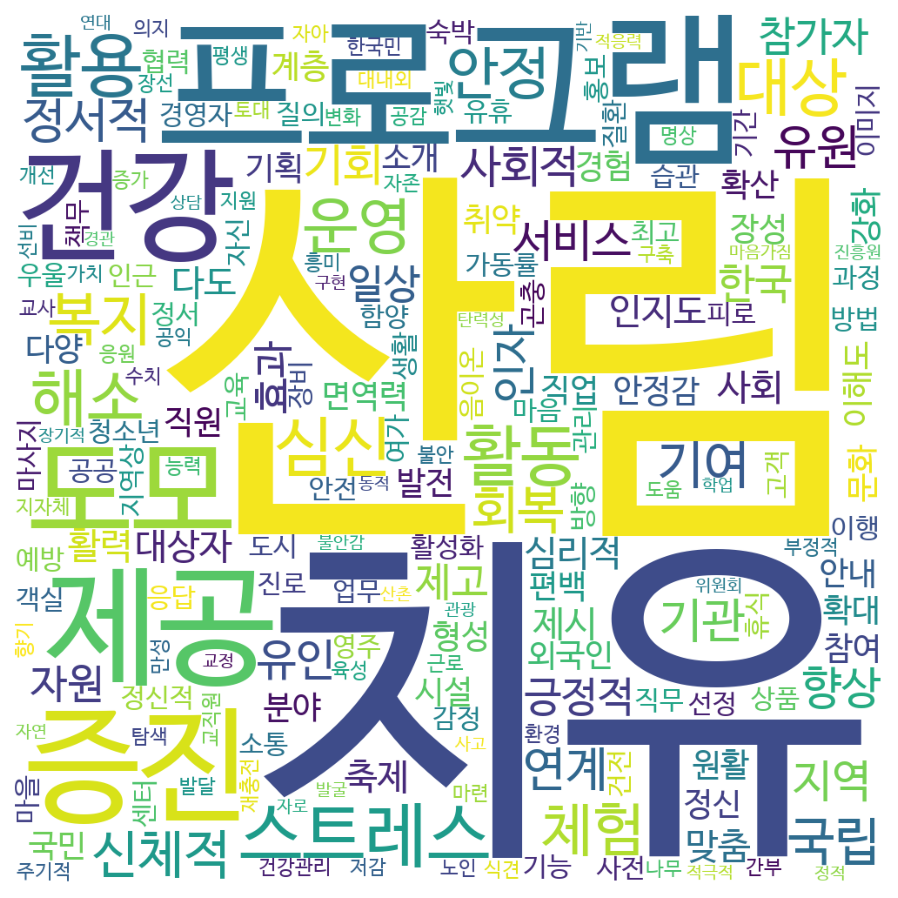

In [ ]:
#빈도를 바탕으로 워드클라우드도 그려볼게요 
#head(100)은 상위 100개 단어를 그려달라는 뜻입니다
#숫자 조정을 통해 표현하고 싶은 단어 갯수를 설정할 수 있어요

from wordcloud import WordCloud
wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', background_color='white', width=1000, height=1000)
cloud = wc.generate_from_frequencies(all_texts.value_counts().head(200))
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

#토픽모델링

In [ ]:
#뽑힌 토픽들을 엑셀로 옮겨줄거에요 

topicn=ldamodel.print_topics(num_words=10)

In [ ]:
topn=[]
for doc in topicn:
    for e in doc:
        topn.append(e)

In [ ]:
topn=pd.Series(topn)

In [ ]:
topn=pd.DataFrame(topn)

In [ ]:
topn.to_excel('tpn.xlsx')

#토픽모델링 시각화

In [ ]:
!pip install --upgrade pyLDAvis==2.1.2

     |████████████████████████████████| 1.6 MB 5.1 MB/s eta 0:00:01
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97738 sha256=496efb050a5a5e6f45ddbfca1426d44ad018ebd668c9abde9201291832989b40
  Stored in directory: /root/.cache/pip/wheels/3b/fb/41/e32e5312da9f440d34c4eff0d2207b46dc9332a7b931ef1e89
Successfully built pyLDAvis


In [ ]:
import pyLDAvis
import pyLDAvis.gensim as gensimvis
pyLDAvis.enable_notebook()

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
lda_viz = gensimvis.prepare(ldamodel, corpus, dictionary)

In [ ]:
lda_viz

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.139462  0.107118       1        1  28.056646
5      0.120597 -0.094497       2        1  14.908243
1      0.004656  0.037511       3        1  13.341763
7      0.070305  0.025794       4        1   9.721736
6     -0.158096 -0.083072       5        1   7.802578
8      0.025685  0.116660       6        1   6.869788
3     -0.153947  0.008960       7        1   6.246254
4     -0.126462  0.110317       8        1   6.111949
0     -0.044473 -0.129806       9        1   3.551648
2      0.122271 -0.098986      10        1   3.389396, topic_info=     Term       Freq      Total Category  logprob  loglift
47   프로그램  62.000000  62.000000  Default  30.0000  30.0000
133    안전  24.000000  24.000000  Default  29.0000  29.0000
40   스트레스  45.000000  45.000000  Default  28.0000  28.0000
9      활동  41.000000  41.000000  Default  27.0000  27.0000
58     감각  32.000000  32.000000  Default  26.0000  26.0000
..    ...        ...        ...      ...      ...      ...
47   프로그램   0.086354  62.127463  Topic10  -6.3111  -3.1940
44     운영   0.086286  46.611049  Topic10  -6.3119  -2.9074
60     자극   0.086268  32.528393  Topic10  -6.3122  -2.5479
35     제공   0.086255  36.911736  Topic10  -6.3123  -2.6745
0      다양   0.086247  38.280862  Topic10  -6.3124  -2.7110

[499 rows x 6 columns], token_table=      Topic      Freq Term
term                      
206       7  0.461335   가능
117       2  0.164336   가족
117       4  0.164336   가족
117       5  0.164336   가족
117       7  0.164336   가족
...     ...       ...  ...
64        7  0.338779   휴식
64        8  0.203268   휴식
64        9  0.067756   휴식
163       4  0.531208   힐링
163       6  0.531208   힐링

[539 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 6, 2, 8, 7, 9, 4, 5, 1, 3])

In [ ]:
pyLDAvis.save_html(lda_viz, './교육프로그램.html')